<a href="https://colab.research.google.com/github/catafest/colab_google/blob/master/catafest_058.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YOLOv9 is a computer vision model developed by Chien-Yao Wang, I-Hau Yeh, and Hong-Yuan Mark Liao. Hong-Yuan Mark Liao and Chien-Yao Wang also worked on the YOLOv4, YOLOR, and YOLOv7, other popular model architectures.

YOLOv9 introduces two new architectures: YOLOv9 and GELAN, both of which are usable from the yolov9 Python repository releasd with th epaper.

See the GitHub project : https://github.com/WongKinYiu/yolov9

YOLOv9 comes in four models, ordered by parameter count:

* v9-S
* v9-M
* v9-C
* v9-E

Read more about this on the HTML version: https://arxiv.org/html/2402.13616v1

I tested with GELAN-C see the table parameters.

In [1]:
!git clone https://github.com/WongKinYiu/yolov9.git


Cloning into 'yolov9'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 161 (delta 25), reused 16 (delta 16), pack-reused 127
Receiving objects: 100% (161/161), 614.36 KiB | 14.98 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
%cd yolov9
!ls -l

/content/yolov9
total 272
-rw-r--r-- 1 root root  6267 Feb 23 18:56 benchmarks.py
drwxr-xr-x 2 root root  4096 Feb 23 18:56 classify
drwxr-xr-x 3 root root  4096 Feb 23 18:56 data
-rw-r--r-- 1 root root 12238 Feb 23 18:56 detect.py
-rw-r--r-- 1 root root 28804 Feb 23 18:56 export.py
drwxr-xr-x 2 root root  4096 Feb 23 18:56 figure
-rw-r--r-- 1 root root  4655 Feb 23 18:56 hubconf.py
drwxr-xr-x 6 root root  4096 Feb 23 18:56 models
drwxr-xr-x 2 root root  4096 Feb 23 18:56 panoptic
-rw-r--r-- 1 root root  7001 Feb 23 18:56 README.md
-rw-r--r-- 1 root root  1073 Feb 23 18:56 requirements.txt
drwxr-xr-x 2 root root  4096 Feb 23 18:56 scripts
drwxr-xr-x 2 root root  4096 Feb 23 18:56 segment
-rw-r--r-- 1 root root 34312 Feb 23 18:56 train_dual.py
-rw-r--r-- 1 root root 33796 Feb 23 18:56 train.py
-rw-r--r-- 1 root root 33829 Feb 23 18:56 train_triple.py
drwxr-xr-x 6 root root  4096 Feb 23 18:56 utils
-rw-r--r-- 1 root root 19595 Feb 23 18:56 val_dual.py
-rw-r--r-- 1 root root 19481 Feb 23 

In [3]:
!pip3 install -r requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


Get model weights

In [4]:
!mkdir -p weights
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

Here is an image with information that can confuse a model.

Yolo models is focused on people and correlation is not done although some images are similar...

In [5]:
!mkdir -p data
!wget -P data -q https://i.imgur.com/utA27wp.jpeg

In [6]:
!ls


benchmarks.py  export.py   panoptic	     segment	      utils	     weights
classify       figure	   README.md	     train_dual.py    val_dual.py
data	       hubconf.py  requirements.txt  train.py	      val.py
detect.py      models	   scripts	     train_triple.py  val_triple.py


In [7]:
!python detect.py --weights weights/gelan-c.pt --conf 0.1 --source data/utA27wp.jpeg --device 0

detect: weights=['weights/gelan-c.pt'], source=data/utA27wp.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v0.1-8-ga1c02c4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/yolov9/data/utA27wp.jpeg: 416x640 1 kite, 221.7ms
Speed: 0.7ms pre-process, 221.7ms inference, 597.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [8]:
!ls

benchmarks.py  export.py   panoptic	     runs	    train.py	     val.py
classify       figure	   __pycache__	     scripts	    train_triple.py  val_triple.py
data	       hubconf.py  README.md	     segment	    utils	     weights
detect.py      models	   requirements.txt  train_dual.py  val_dual.py


I have not tested on portions of images where the correlation of information could lead to interpretation errors ... but a model trained on logos would also solve this correlation of information.

In conclusion, you can't beat something very well trained...

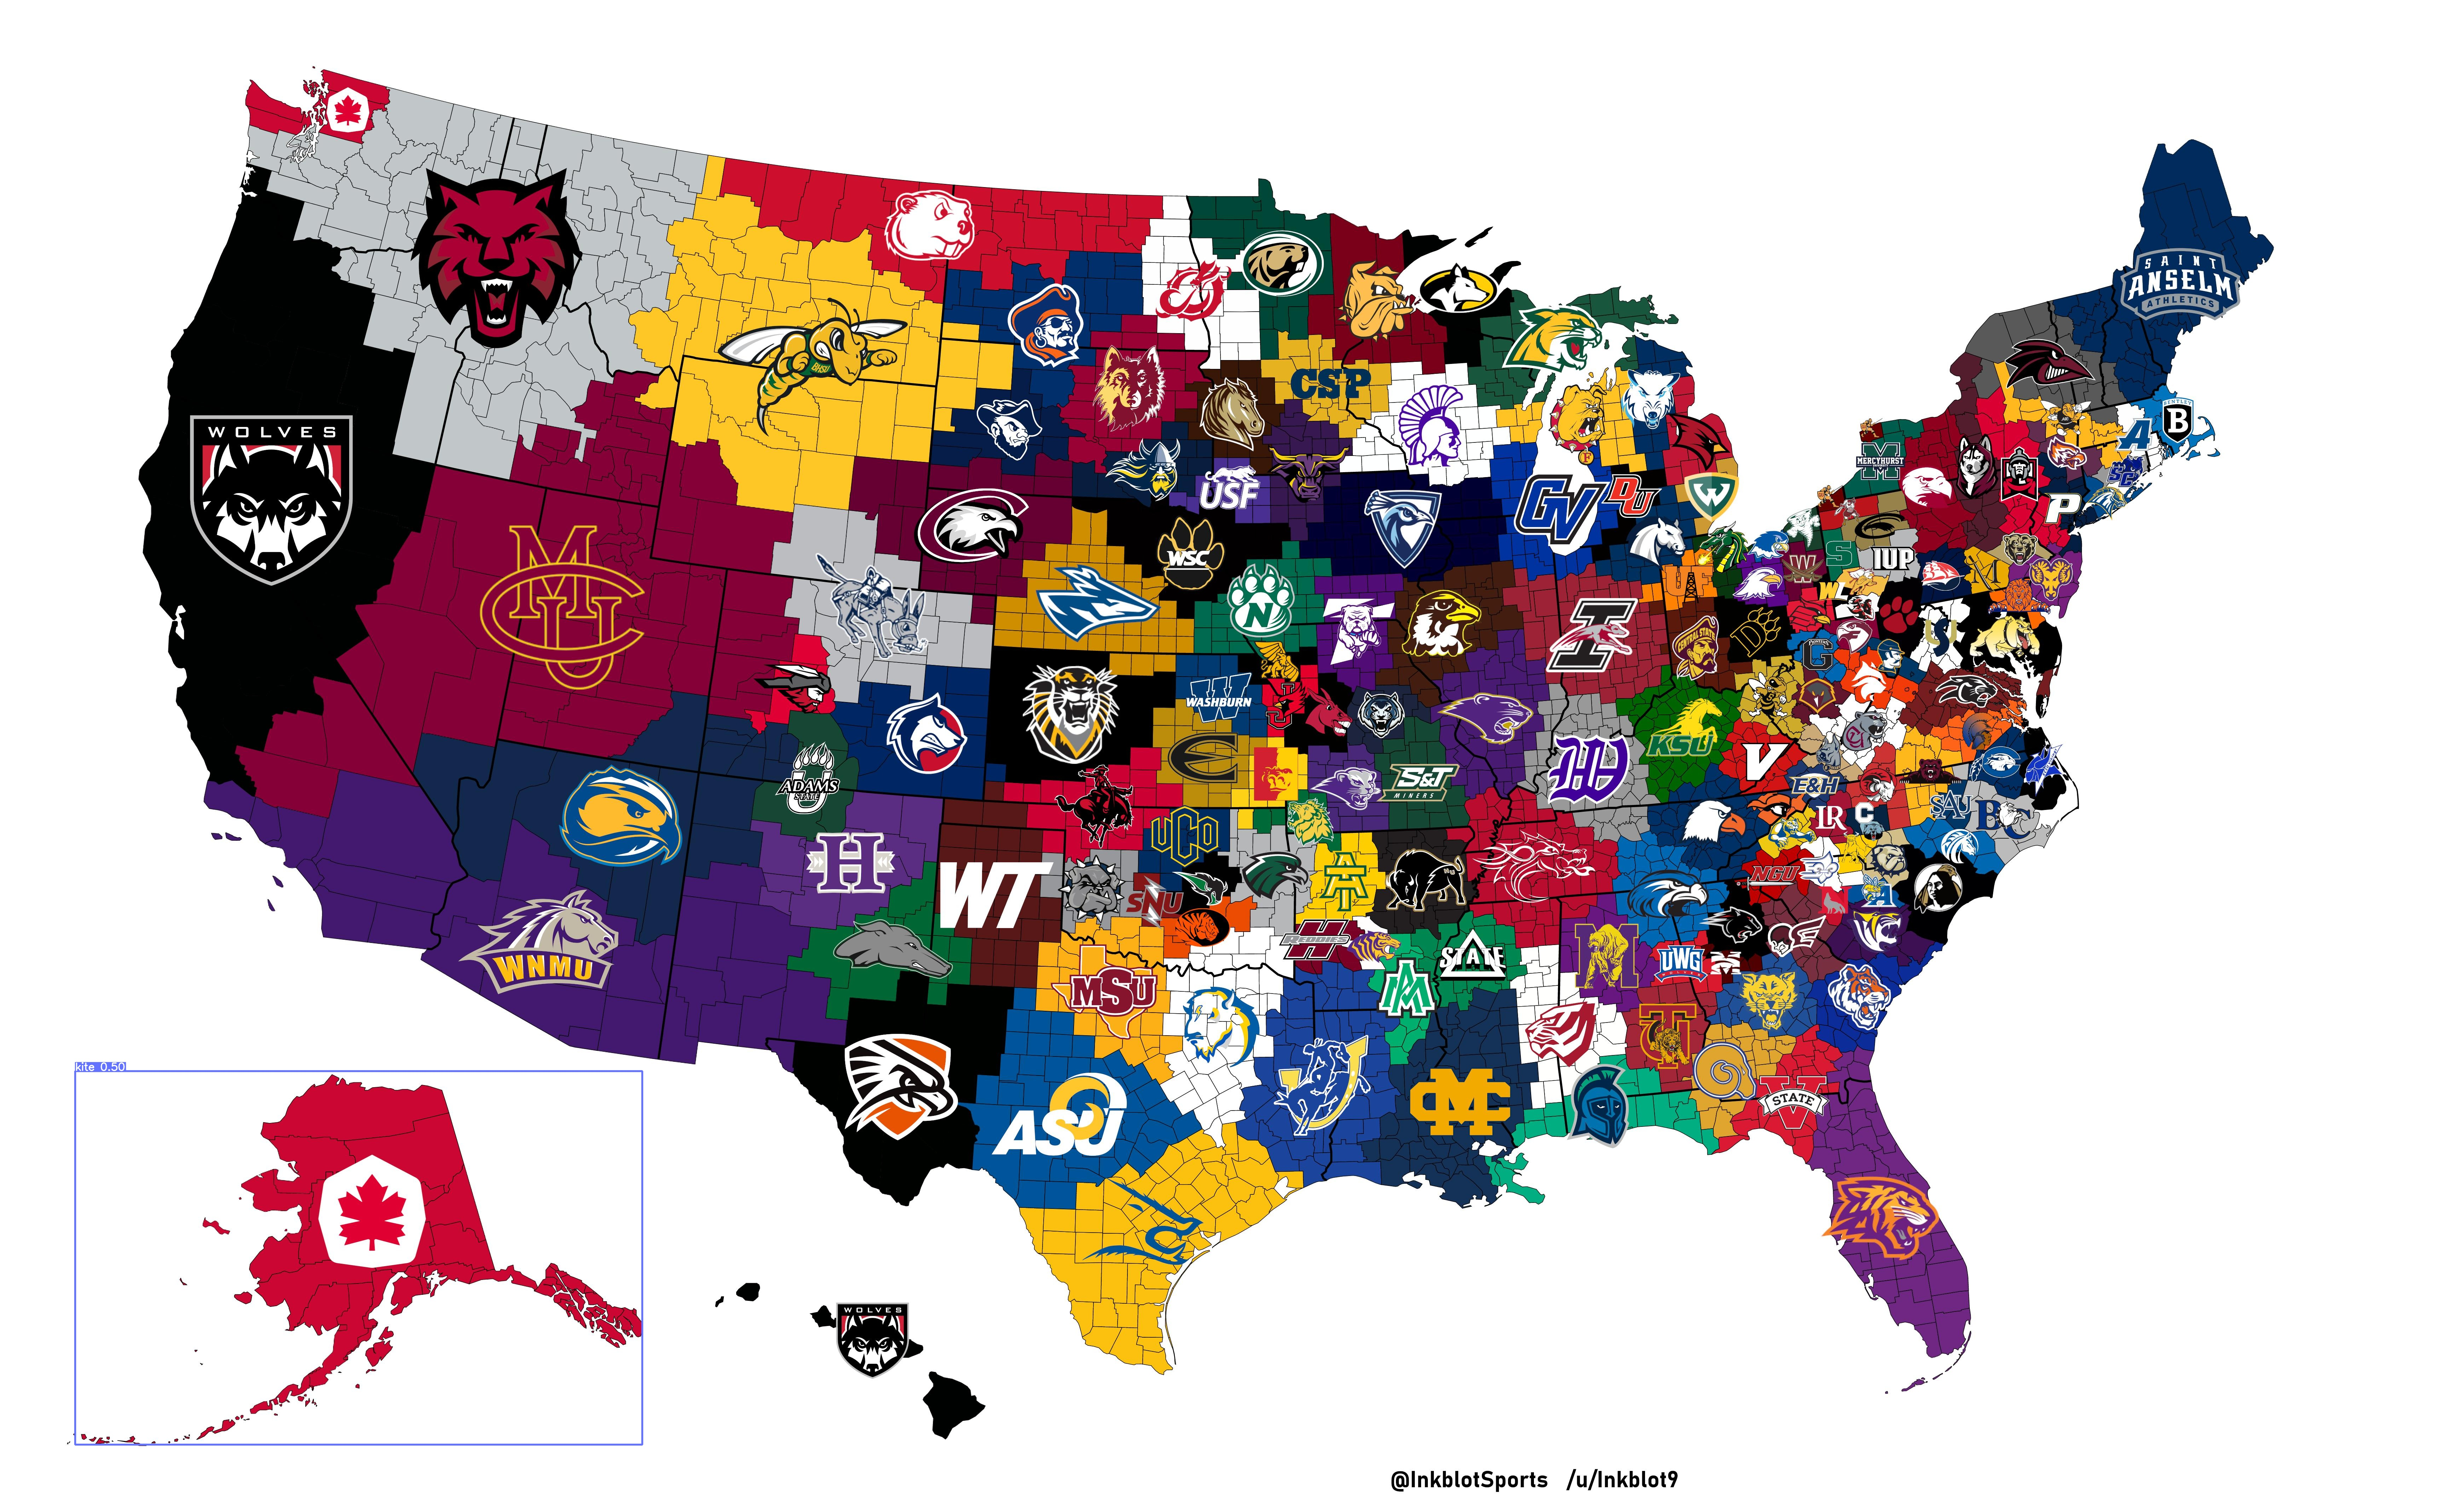

In [9]:
from IPython.display import Image
Image("runs/detect/exp/utA27wp.jpeg")

In [10]:
!mkdir -p data
!wget -P data -q https://i.imgur.com/HOCpOLN.jpeg

In [11]:
!python detect.py --weights weights/gelan-c.pt --conf 0.1 --source data/HOCpOLN.jpeg --device 0

detect: weights=['weights/gelan-c.pt'], source=data/HOCpOLN.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v0.1-8-ga1c02c4 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/yolov9/data/HOCpOLN.jpeg: 416x640 8 persons, 3 cars, 1 truck, 1 baseball bat, 122.3ms
Speed: 0.4ms pre-process, 122.3ms inference, 525.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


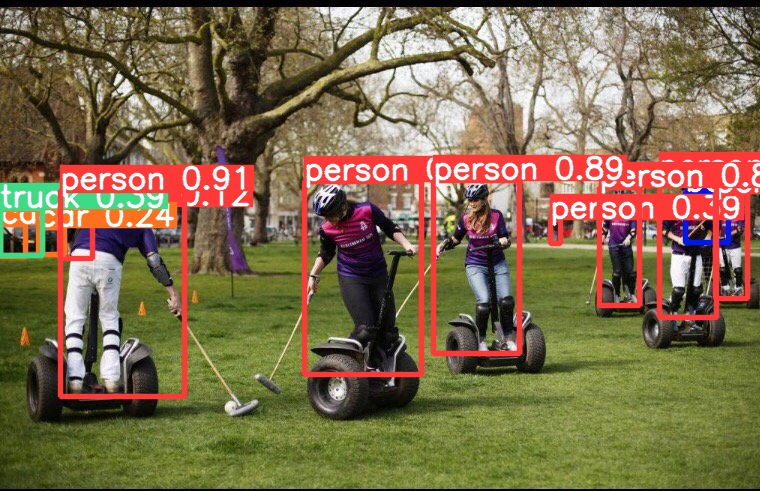

In [12]:
from IPython.display import Image
Image("runs/detect/exp2/HOCpOLN.jpeg")